In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
df = pd.read_csv('./cosine_similarity-equal.csv',encoding = "ISO-8859-1")  # taipei news data(for predict)

df_train = pd.read_csv('./gept-3.csv',encoding = "ISO-8859-1")  #gept data( for train)
df_train = df_train.reindex(np.random.permutation(df_train.index))  # 打亂 df 的排序 np.random.permutation()


#df.head(3)
#df_train.head(3) 

In [2]:
# 詞袋模型: 句子 -> 單字 -> 詞袋(稀疏矩陣)
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
#docs = np.array([
#        'The sun is shining',
#        'The weather is sweet',
#        'The sun is shining and the weather is sweet'])
#bag = count.fit_transform(docs)

#print(count.vocabulary_) # 詞頻

#print(bag.toarray()) # 詞袋(稀疏矩陣) -> 特徵向量(列：句子, 行：字詞)

In [3]:
# 計算 TF-IDF, 使用 L2正規化 
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
#print(tfidf.fit_transform(count.fit_transform(docs)).toarray())

In [4]:
# 文件清理
# 用正規表示式
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text) # 清除 HTML
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text) # 清除 標點符號
    text = re.sub('[\W]+', ' ', text.lower()) + \
           ' '.join(emoticons).replace('-', '') # 非字元符號, - 
    return text

In [5]:
# 所有文本清除前
#print(df['article'].head(20))

In [6]:
# 所有文本清除後
df['Content'] = df['Content'].apply(preprocessor)
df_train['article'] = df_train['article'].apply(preprocessor)


#print(df['Content'].head(20))
#print(df_train['article'].head(20))

In [7]:
# 文件轉為字符
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):  # 方法1. 空白字元斷字
    return text.split()
def tokenizer_porter(text): # 方法2. 字詞 -> 字根
    return [porter.stem(word) for word in text.split()]

In [8]:
# 命令提示字元 執行 pip install nltk
# 處理停用字(常見但又無用的字, is and or...)
import nltk
nltk.download('stopwords')

# 使用英文停用字集
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ISAAC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:

X_train = df_train.loc[:,'article'];
y_train = df_train.loc[:, 'rating'];

X_test =  df.loc[:,'Content'];
y_test = df.loc[:,'Similar_Label'];


In [10]:
#X_train.shape
#y_train.shape
#X_test.shape
#y_test.shape

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
from sklearn.learning_curve import learning_curve



#畫圖的function  plot_decision_regions
def learnCurve(classifier,train_vector, y_train,title):
    plt_title = title
    train_sizes, train_scores, test_scores =\
                learning_curve(estimator=classifier, 
                X=train_vector, 
                y=y_train, 
                train_sizes=np.linspace(0.1, 1.0, 10), 
                cv=10,
                n_jobs=1)
        

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='training accuracy')

    plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5,label='validation accuracy')

    plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std, alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.1, 1.0])
    plt.tight_layout()
    plt.title(plt_title)
    # plt.savefig('./figures/learning_curve.png', dpi=300)

C:\Users\ISAAC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ISAAC\Anaconda3\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Results for SVC(kernel=rbf)
Accuracy: 0.51
Training time: 0.028539s; Prediction time: 0.104574s
             precision    recall  f1-score   support

          1       0.51      1.00      0.68       400
          2       0.00      0.00      0.00       378

avg / total       0.26      0.51      0.35       778



C:\Users\ISAAC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


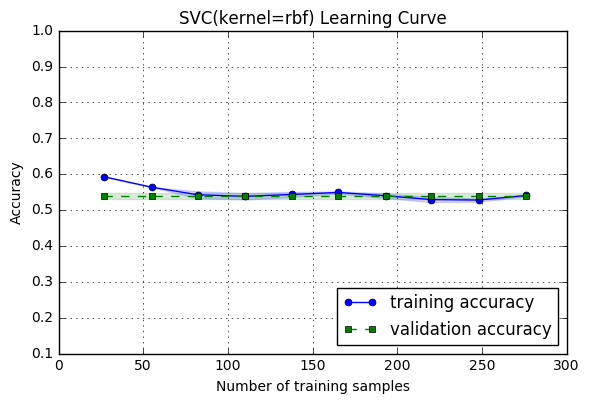

Results for SVC(kernel=linear)
Accuracy: 0.51
Training time: 0.025017s; Prediction time: 0.089547s
             precision    recall  f1-score   support

          1       0.65      0.08      0.15       400
          2       0.50      0.95      0.65       378

avg / total       0.57      0.51      0.39       778



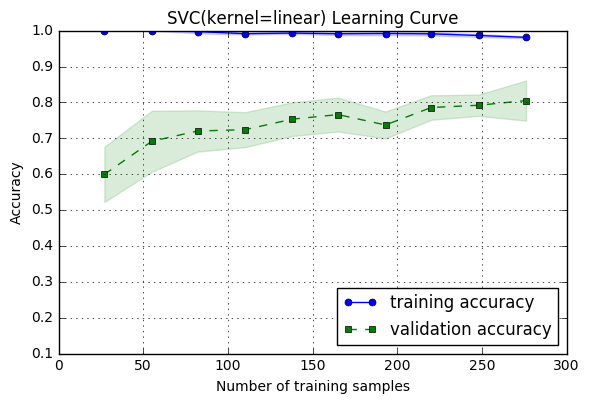

Results for LinearSVC
Accuracy: 0.50
Training time: 0.002501s; Prediction time: 0.000501s
             precision    recall  f1-score   support

          1       0.60      0.07      0.12       400
          2       0.49      0.95      0.65       378

avg / total       0.55      0.50      0.38       778



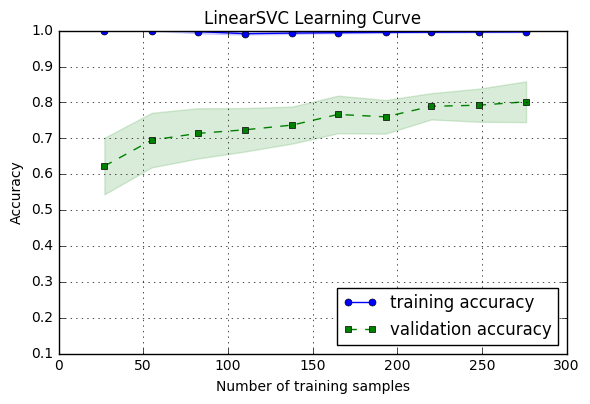

Results for MultinomialNB
Accuracy: 0.53
Training time: 0.001001s; Prediction time: 0.000500s
             precision    recall  f1-score   support

          1       0.70      0.17      0.27       400
          2       0.51      0.93      0.66       378

avg / total       0.61      0.53      0.46       778



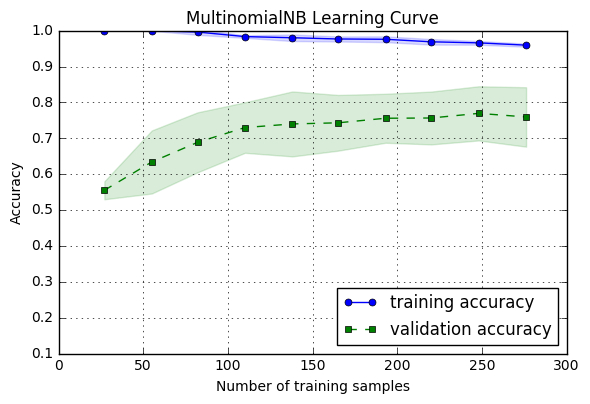

Results for BernoulliNB
Accuracy: 0.45
Training time: 0.001001s; Prediction time: 0.002000s
             precision    recall  f1-score   support

          1       0.17      0.02      0.03       400
          2       0.47      0.91      0.62       378

avg / total       0.32      0.45      0.32       778



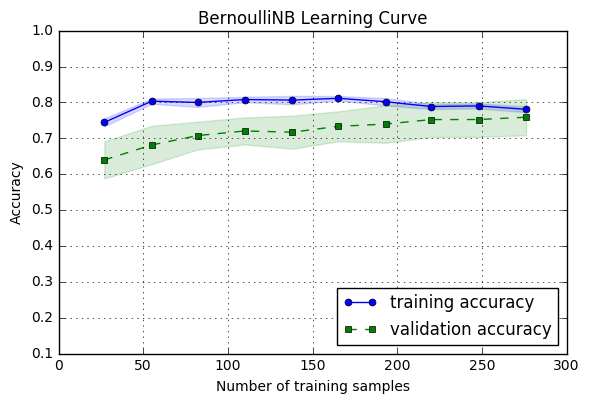

Results for KNN
Accuracy: 0.49
Training time: 0.000500s; Prediction time: 0.018513s
             precision    recall  f1-score   support

          1       0.50      0.03      0.05       400
          2       0.49      0.97      0.65       378

avg / total       0.49      0.49      0.34       778



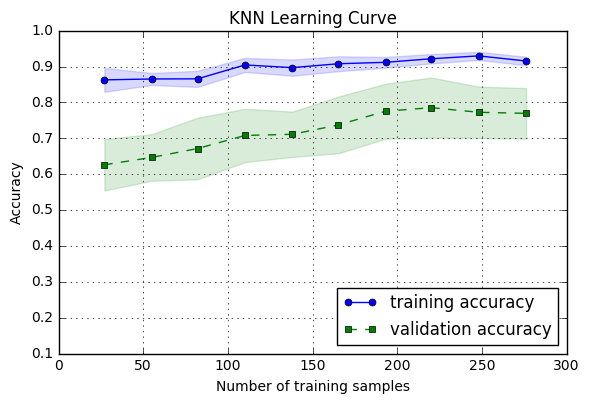

Results for LogisticRegression
Accuracy: 0.51
Training time: 0.004458s; Prediction time: 0.001005s
             precision    recall  f1-score   support

          1       0.68      0.10      0.17       400
          2       0.50      0.95      0.65       378

avg / total       0.59      0.51      0.40       778



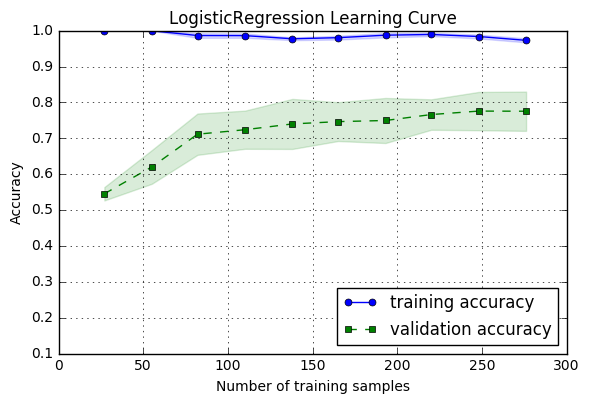

In [12]:
import sys
import os
import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
from sklearn.metrics import roc_auc_score, accuracy_score

    
# Create feature vectors
vectorizer = TfidfVectorizer(min_df=5,
                             max_df = 0.8,
                             sublinear_tf=True,
                             stop_words=stop,
                              tokenizer=tokenizer_porter,
                             use_idf=True)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

# Perform classification with SVM, kernel=rbf
classifier_rbf = svm.SVC()
t0 = time.time()
fit_svm_rbf = classifier_rbf.fit(train_vectors, y_train)
t1 = time.time()
prediction_rbf = classifier_rbf.predict(test_vectors)
prediction_rbf_score = accuracy_score(y_test, prediction_rbf)  #評分方式 accuracy_score()
#prediction_rbf_roc_auc_score  = roc_auc_score(y_true=y_test, y_score=prediction_rbf) #ROC
t2 = time.time()
time_rbf_train = t1-t0
time_rbf_predict = t2-t1


# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
fit_svm_linear = classifier_linear.fit(train_vectors, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
prediction_linear_score = accuracy_score(y_test, prediction_linear)  #評分方式 accuracy_score()
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1



# Perform classification with SVM, kernel=linear
classifier_liblinear = svm.LinearSVC()
t0 = time.time()
fit_svm_liblinear = classifier_liblinear.fit(train_vectors, y_train)
t1 = time.time()
prediction_liblinear = classifier_liblinear.predict(test_vectors)
prediction_liblinear_score = accuracy_score(y_test, prediction_liblinear)  #評分方式 accuracy_score()
t2 = time.time()
time_liblinear_train = t1-t0
time_liblinear_predict = t2-t1



# Perform classification with naive_bayes, kernel=MultinomialNB
#clf = MultinomialNB()
classifier_MultinomialNB = MultinomialNB(alpha=1.0, fit_prior=True)
t0 = time.time()
fit_MultinomialNB = classifier_MultinomialNB.fit(train_vectors, y_train)
t1 = time.time()
prediction_MultinomialNB = classifier_MultinomialNB.predict(test_vectors)
prediction_MultinomialNB_score = accuracy_score(y_test, prediction_MultinomialNB)  #評分方式 accuracy_score()
t2 = time.time()
time_MultinomialNB_train = t1-t0
time_MultinomialNB_predict = t2-t1


# Perform classification with naive_bayes, kernel=BernoulliNB
#clf = BernoulliNB()
classifier_BernoulliNB = BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
t0 = time.time()
fit_BernoulliNB = classifier_BernoulliNB.fit(train_vectors, y_train)
t1 = time.time()
prediction_BernoulliNB = classifier_BernoulliNB.predict(test_vectors) 
prediction_BernoulliNB_score = accuracy_score(y_test, prediction_BernoulliNB)  #評分方式 accuracy_score()
t2 = time.time()
time_BernoulliNB_train = t1-t0
time_BernoulliNB_predict = t2-t1


# Perform classification with KNN
classifier_neigh = KNeighborsClassifier(n_neighbors=3)
t0 = time.time()
fit_KNN = classifier_neigh.fit(train_vectors, y_train)
t1 = time.time()
prediction_KNN =classifier_neigh.predict(test_vectors)
prediction_KNN_score = accuracy_score(y_test, prediction_KNN)  #評分方式 accuracy_score()
t2 = time.time()
time_KNN_train = t1-t0
time_KNN_predict = t2-t1



# Perform classification with LogisticRegression
classifier_Logistic = LogisticRegression()
t0 = time.time()
Logistic_KNN = classifier_Logistic.fit(train_vectors, y_train)
t1 = time.time()
prediction_Logistic = classifier_Logistic.predict(test_vectors)
prediction_Logistic_score = accuracy_score(y_test, prediction_Logistic)  #評分方式 accuracy_score()
t2 = time.time()
time_Logistic_train = t1-t0
time_Logistic_predict = t2-t1



# Print results in a nice table
print("Results for SVC(kernel=rbf)")
print('Accuracy: %.2f' % prediction_rbf_score)
#print('ROC AUC: %.3f' % prediction_rbf_roc_auc_score)
print("Training time: %fs; Prediction time: %fs" % (time_rbf_train, time_rbf_predict))
print(classification_report(y_test, prediction_rbf))

learnCurve(classifier_rbf,train_vectors,y_train,'SVC(kernel=rbf) Learning Curve')
plt.show()


print("Results for SVC(kernel=linear)")
print('Accuracy: %.2f' % prediction_linear_score)
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(y_test, prediction_linear))

learnCurve(classifier_linear,train_vectors,y_train,'SVC(kernel=linear) Learning Curve')
plt.show()


print("Results for LinearSVC")
print('Accuracy: %.2f' % prediction_liblinear_score)
print("Training time: %fs; Prediction time: %fs" % (time_liblinear_train, time_liblinear_predict))
print(classification_report(y_test, prediction_liblinear))

learnCurve(classifier_liblinear,train_vectors,y_train,'LinearSVC Learning Curve')
plt.show()


print("Results for MultinomialNB")
print('Accuracy: %.2f' % prediction_MultinomialNB_score)
print("Training time: %fs; Prediction time: %fs" % (time_MultinomialNB_train, time_MultinomialNB_predict))
print(classification_report(y_test, prediction_MultinomialNB))

learnCurve(classifier_MultinomialNB,train_vectors,y_train,'MultinomialNB Learning Curve')
plt.show()


print("Results for BernoulliNB")
print('Accuracy: %.2f' % prediction_BernoulliNB_score)
print("Training time: %fs; Prediction time: %fs" % (time_BernoulliNB_train, time_BernoulliNB_predict))
print(classification_report(y_test, prediction_BernoulliNB))

learnCurve(classifier_BernoulliNB,train_vectors,y_train,'BernoulliNB Learning Curve')
plt.show()


print("Results for KNN")
print('Accuracy: %.2f' % prediction_KNN_score)
print("Training time: %fs; Prediction time: %fs" % (time_KNN_train, time_KNN_predict))
print(classification_report(y_test, prediction_KNN))

learnCurve(classifier_neigh,train_vectors,y_train,'KNN Learning Curve')
plt.show()


print("Results for LogisticRegression")
print('Accuracy: %.2f' % prediction_Logistic_score)
print("Training time: %fs; Prediction time: %fs" % (time_Logistic_train, time_Logistic_predict))
print(classification_report(y_test, prediction_Logistic))

learnCurve(classifier_Logistic,train_vectors,y_train,'LogisticRegression Learning Curve')
plt.show()


In [13]:
classifier_Logistic.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [14]:
classifier_neigh.predict_proba(test_vectors)

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])